### 2010 DATABASE ANALYSIS using all columns

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import mplleaflet

plt.style.use('fivethirtyeight')

In [3]:
chi_crime = pd.read_csv('Chicago_Crimes_2010_TO_31OCT16.csv')
chi_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508593,HZ250410,05/03/2016 09:00:00 PM,042XX W MADISON ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,...,28.0,26.0,18,1148220.0,1899677.0,2016,05/10/2016 03:56:50 PM,41.880658,-87.731212,"(41.880658176, -87.731212135)"
1,10508594,HZ250385,05/03/2016 09:35:00 PM,065XX S KEDVALE AVE,0810,THEFT,OVER $500,APARTMENT,False,True,...,13.0,65.0,06,1149830.0,1860872.0,2016,05/10/2016 03:56:50 PM,41.774141,-87.726307,"(41.77414081, -87.726307093)"
2,10508595,HZ250362,05/03/2016 02:45:00 PM,045XX S DAMEN AVE,0560,ASSAULT,SIMPLE,STREET,False,True,...,12.0,61.0,08A,1163662.0,1874660.0,2016,05/10/2016 03:56:50 PM,41.811698,-87.675214,"(41.811697721, -87.675214316)"
3,10508597,HZ250202,05/03/2016 06:42:00 PM,063XX S CLAREMONT AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,15.0,66.0,08B,1161829.0,1862607.0,2016,05/10/2016 03:56:50 PM,41.778661,-87.682273,"(41.778661058, -87.68227253)"
4,10508598,HZ250298,05/03/2016 03:00:00 PM,070XX S INDIANA AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,6.0,69.0,03,1178808.0,1858478.0,2016,05/10/2016 03:56:50 PM,41.766961,-87.620152,"(41.766961034, -87.620152116)"


In [4]:
chi_crime.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [5]:
chi_crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
chi_crime2 = chi_crime.copy()

In [7]:
chi_crime2['Date'] = pd.to_datetime(chi_crime2['Date'], format='%m/%d/%Y %I:%M:%S %p')


In [8]:
chi_crime2['Date'].describe()

count                 2124947
unique                 812820
top       2012-01-01 00:01:00
freq                      164
first     2010-01-01 00:01:00
last      2016-10-31 23:58:00
Name: Date, dtype: object

In [9]:
chi_crime2.sort_values(by='Date').head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
402644,7808351,HS616602,2010-01-01 00:01:00,023XX E 71ST ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,5.0,43.0,06,1192930.0,1858364.0,2010,02/04/2016 06:33:39 AM,41.766315,-87.568394,"(41.76631523, -87.568393842)"
753276,8360688,HT593722,2010-01-01 00:01:00,040XX W OAKDALE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,31.0,21.0,06,1148910.0,1919308.0,2010,02/04/2016 06:33:39 AM,41.934514,-87.728170,"(41.93451428, -87.728169939)"
188070,7476522,HS278626,2010-01-01 00:01:00,079XX S LANGLEY AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,STREET,False,False,...,6.0,44.0,06,1182274.0,1852436.0,2010,02/04/2016 06:33:39 AM,41.750302,-87.607635,"(41.750301596, -87.607634773)"
420052,7836844,HS642467,2010-01-01 00:01:00,092XX S ADA ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,True,...,21.0,73.0,17,1168950.0,1843572.0,2010,02/04/2016 06:33:39 AM,41.726276,-87.656715,"(41.726275533, -87.656715211)"
5320,10523663,HZ266368,2010-01-01 00:01:00,022XX N LAVERGNE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,31.0,19.0,11,NaN,NaN,2010,05/16/2016 03:50:35 PM,NaN,NaN,NaN


In [10]:
#  list of Violent crimes per IUCR Codes 
violent_list = ['0110','0130','0261','0262','0263','0264','0265','0266',
                                               '0271','0272','0273','0274','0275','0281','0291','1753',
                                               '1754','0312','0313','031A','031B','0320','0325','0326',
                                               '0330','0331','0334','0337','033A','033B','0340','041A',
                                               '041B','0420','0430','0450','0451','0452','0453','0461',
                                               '0462','0479','0480','0481','0482','0483','0485','0488',
                                               '0489','0490','0491','0492','0493','0495','0496','0497',
                                               '0498','0510','051A','051B','0520','0530','0550','0551',
                                               '0552','0553','0555','0556','0557','0558']

In [11]:
# add Violent column to Dataframe
chi_crime2['Violent'] = chi_crime2['IUCR'].isin(violent_list)
chi_crime2.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Violent                           bool
dtype: object

In [12]:
chi_crime2['Violent'].value_counts()

False    1942407
True      182540
Name: Violent, dtype: int64

In [13]:
# add month, day of month, day of week, hour for time analysis below

chi_crime2['Hour'] = chi_crime2['Date'].map(lambda x: x.strftime("%H"))
chi_crime2['Day_of_week'] = chi_crime2['Date'].dt.dayofweek
chi_crime2['Month'] = chi_crime2['Date'].map(lambda x: x.strftime("%m"))
chi_crime2['Day_of_month'] = chi_crime2['Date'].map(lambda x: x.strftime("%d"))

In [14]:
chiviol = chi_crime2[chi_crime2['Violent'] == True]
chinonviol = chi_crime2[chi_crime2['Violent'] == False]

In [43]:
chinonviol.Arrest.sum()

533309

In [15]:
chinonviol['Primary Type'].value_counts()

THEFT                                468748
BATTERY                              327293
CRIMINAL DAMAGE                      227444
NARCOTICS                            215244
BURGLARY                             133103
OTHER OFFENSE                        126512
MOTOR VEHICLE THEFT                   96752
DECEPTIVE PRACTICE                    96625
ASSAULT                               96524
CRIMINAL TRESPASS                     53707
WEAPONS VIOLATION                     24113
PUBLIC PEACE VIOLATION                19489
OFFENSE INVOLVING CHILDREN            14918
PROSTITUTION                          12434
INTERFERENCE WITH PUBLIC OFFICER       7853
SEX OFFENSE                            6913
GAMBLING                               3869
LIQUOR LAW VIOLATION                   3291
ARSON                                  3154
KIDNAPPING                             1649
STALKING                               1159
INTIMIDATION                            998
OBSCENITY                       

In [16]:
chinonviol['IUCR'].unique()

array(['1811', '0810', '0560', '0486', '4625', '0820', '2029', '4387',
       '1320', '1310', '1153', '0870', '2220', '2022', '2826', '0890',
       '0620', '143A', '0460', '1720', '5001', '1563', '502P', '5007',
       '0470', '0910', '5002', '1130', '1305', '2825', '1477', '2820',
       '1152', '0860', '1154', '1150', '2850', '1330', '501A', '0580',
       '2840', '0610', '0630', '1110', '0880', '1541', '1752', '1792',
       '1261', '1562', '1544', '1121', '4650', '0554', '1710', '0850',
       '1365', '1156', '3731', '1821', '143B', '1512', '0545', '0484',
       '2170', '2093', '2028', '5111', '2024', '1360', '5011', '2034',
       '4510', '2092', '502R', '0454', '2027', '1350', '1210', '1780',
       '2014', '1661', '1506', '141A', '0930', '0650', '1200', '2860',
       '5000', '1155', '0920', '1750', '1812', '2017', '2031', '1822',
       '2015', '2025', '2091', '2018', '2021', '2032', '4651', '1120',
       '1122', '3960', '1565', '1195', '2023', '1435', '3300', '4230',
      

### Time of the Crime:  Hour, Day, Month Analysis

In [59]:
grouped_day_viol = pd.DataFrame(chiviol.groupby(['Day_of_week']).ID.count())
grouped_day_viol.reset_index(inplace=True)
grouped_day_viol.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_day_viol

,Day_of_week,Incidence_Count
0,0,25404
1,1,24653
2,2,24695
3,3,24520
4,4,25836
5,5,28527
6,6,28905


In [60]:
grouped_day_nonviol = pd.DataFrame(chinonviol.groupby(['Day_of_week']).ID.count())
grouped_day_nonviol.reset_index(inplace=True)
grouped_day_nonviol.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_day_nonviol

,Day_of_week,Incidence_Count
0,0,274906
1,1,277308
2,2,279512
3,3,277886
4,4,294787
5,5,275613
6,6,262395


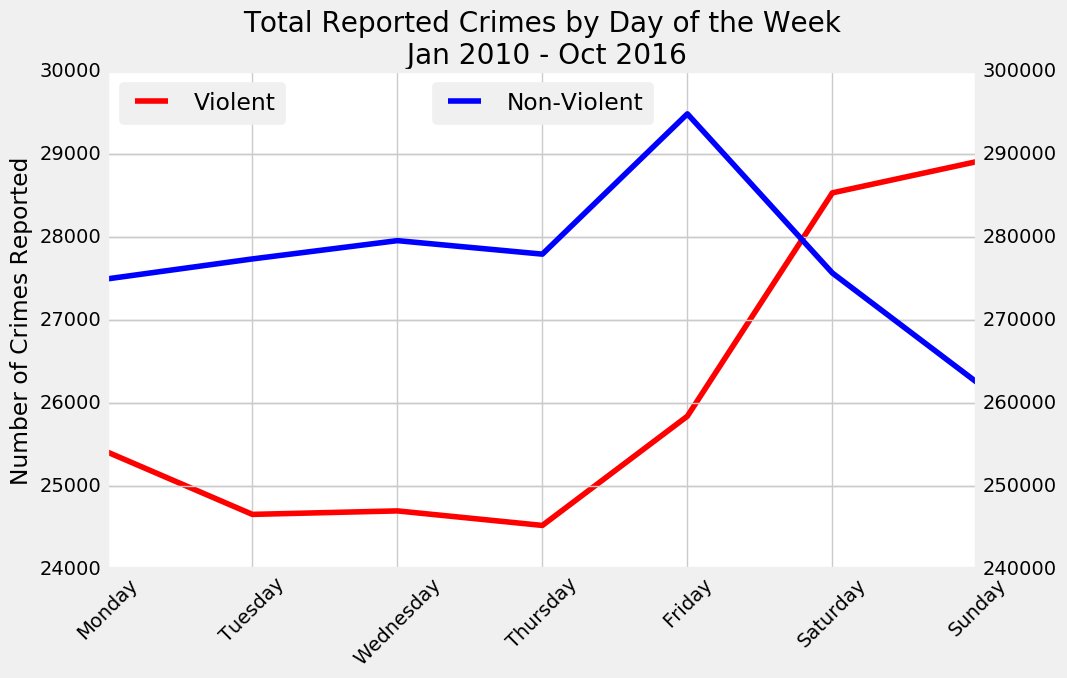

In [84]:

fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()
ax.plot(grouped_day_viol.Incidence_Count, label = 'Violent', color = 'r')
ax2.plot(grouped_day_nonviol.Incidence_Count, label = 'Non-Violent', color = 'b')

ax.set_title("Total Reported Crimes by Day of the Week\n Jan 2010 - Oct 2016")
ax.set_ylabel('Number of Crimes Reported')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
ax.set_axis_bgcolor('white')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper center')
ax.set_ylim(ymin = 24000, ymax=30000)
ax2.set_ylim(ymin = 240000, ymax=300000)

plt.savefig('day_of_week_chart.png', bbox_inches = 'tight')

In [99]:
timesviol = pd.DatetimeIndex(chiviol.Date)
timesnonviol = pd.DatetimeIndex(chinonviol.Date)
groupedviolhr = chiviol.groupby([timesviol.hour])
groupednonviolhr = chinonviol.groupby([timesnonviol.hour])

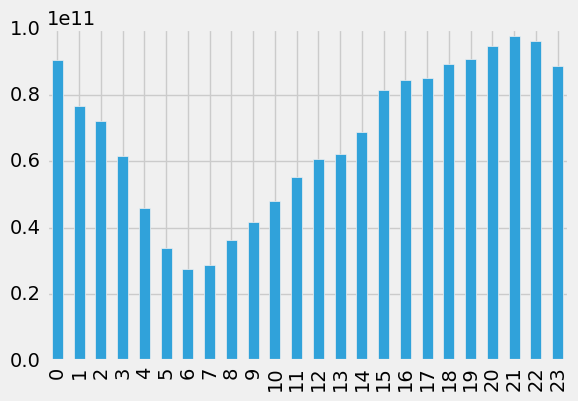

In [111]:
groupedviolhr['ID'].sum().plot(kind = 'bar')

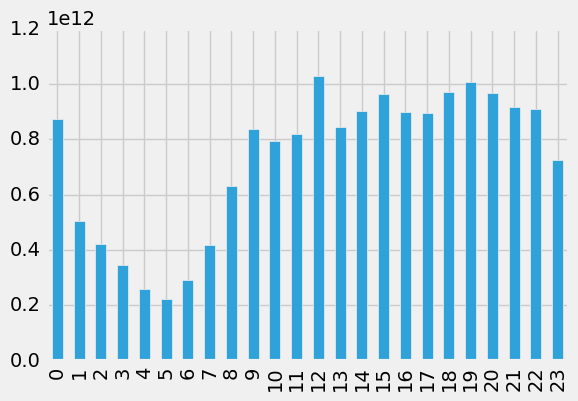

In [110]:
groupednonviolhr['ID'].sum().plot(kind = 'bar')

In [113]:
groupedviolmth = chiviol.groupby([timesviol.month])
groupednonviolmth = chinonviol.groupby([timesnonviol.month])

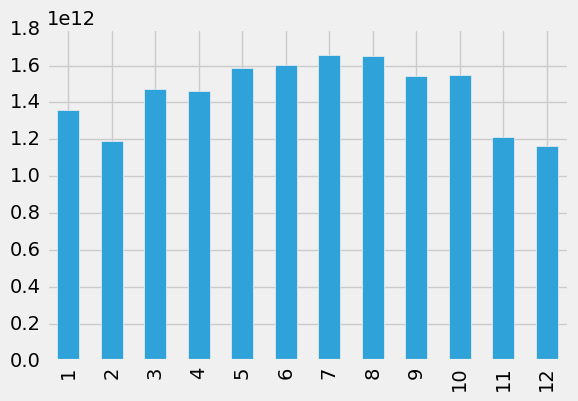

In [114]:
groupednonviolmth['ID'].sum().plot(kind = 'bar')

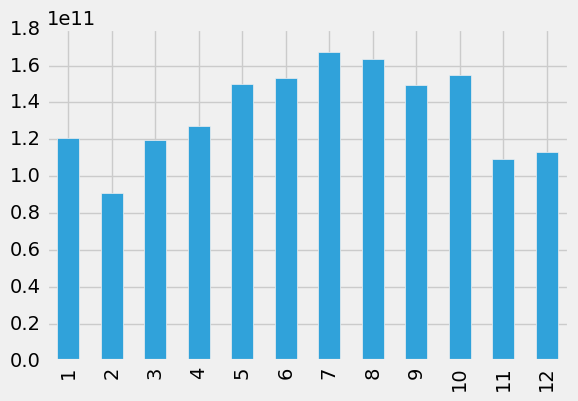

In [115]:
groupedviolmth['ID'].sum().plot(kind = 'bar')

### Year on Year Change Charts

In [19]:
grouped_yr_mo_viol = pd.DataFrame(chiviol.groupby(['Violent','Year','Month']).ID.count())
grouped_yr_mo_viol.reset_index(inplace=True)
grouped_yr_mo_viol.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_yr_mo_viol.head()

,Violent,Year,Month,Incidence_Count
0,True,2010,01,2354
1,True,2010,02,1726
2,True,2010,03,2431
3,True,2010,04,2670
4,True,2010,05,2789


In [20]:
grouped_yr_mo_nonviol = pd.DataFrame(chinonviol.groupby(['Violent','Year','Month']).ID.count())
grouped_yr_mo_nonviol.reset_index(inplace=True)
grouped_yr_mo_nonviol.rename(columns = {'ID':'Incidence_Count'},inplace=True)
grouped_yr_mo_nonviol.head()

,Violent,Year,Month,Incidence_Count
0,False,2010,01,26663
1,False,2010,02,23205
2,False,2010,03,29892
3,False,2010,04,28986
4,False,2010,05,30600


In [21]:
from datetime import datetime
grouped_yr_mo_viol['Year_Month'] = grouped_yr_mo_viol.apply(lambda row: datetime(row.Year, int(row.Month), 1), axis=1)
grouped_yr_mo_nonviol['Year_Month'] = grouped_yr_mo_nonviol.apply(lambda row: datetime(row.Year, int(row.Month), 1), axis=1)


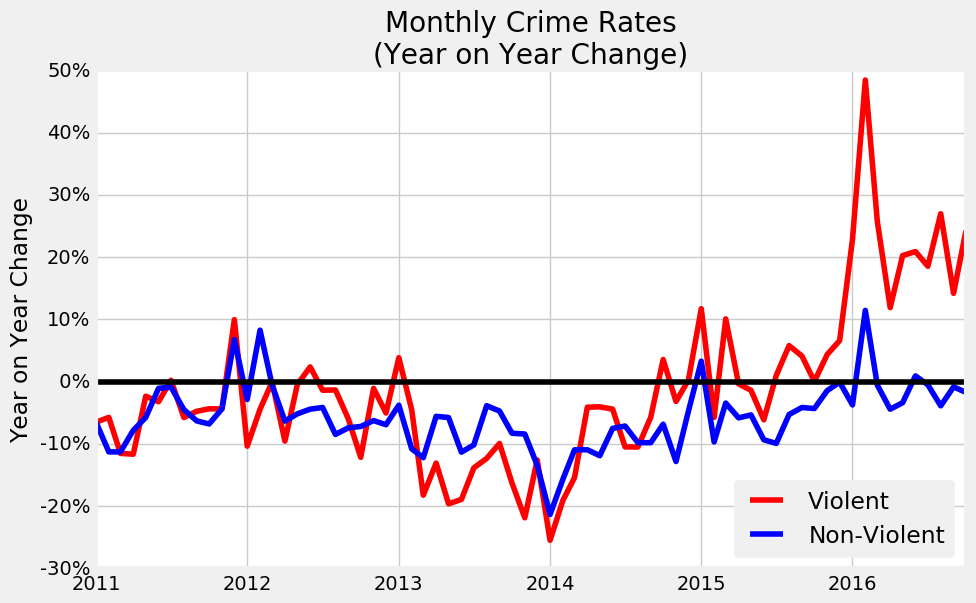

In [22]:
#  Year on year % change for violent and non violent crime 

grouped_yr_mo_viol['yony_change'] = grouped_yr_mo_viol['Incidence_Count'].pct_change(periods = 12)
grouped_yr_mo_nonviol['yony_change'] = grouped_yr_mo_nonviol['Incidence_Count'].pct_change(periods = 12)

grouped_yr_mo_wide_viol = grouped_yr_mo_viol.pivot(index='Year_Month', columns='Violent', values='yony_change')
grouped_yr_mo_wide_nonviol = grouped_yr_mo_nonviol.pivot(index='Year_Month', columns='Violent', values='yony_change')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(grouped_yr_mo_wide_viol, 'k', label = 'Violent', color = 'r')
ax.plot(grouped_yr_mo_wide_nonviol, 'k', label = 'Non-Violent', color = 'b')

plt.axhline(0, color='black')
vals = ax.get_yticks()

ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_title("Monthly Crime Rates\n(Year on Year Change)")
ax.set_ylabel('Year on Year Change')
ax.set_axis_bgcolor('white')
ax.legend(loc = 'lower right')

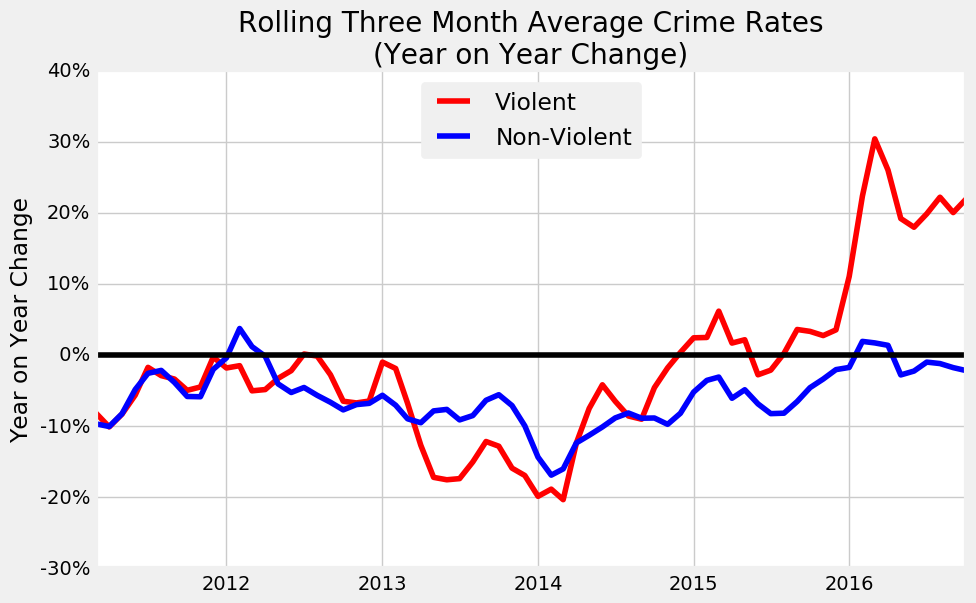

In [23]:
#  created this just to see if a 90 day rolling ave would make more compelling chart



grouped_yr_mo_viol['90 Day Rolling Average'] = grouped_yr_mo_viol['Incidence_Count'].rolling(window = 3, center = False).sum()
grouped_yr_mo_nonviol['90 Day Rolling Average'] = grouped_yr_mo_nonviol['Incidence_Count'].rolling(window = 3, center = False).sum()
grouped_yr_mo_viol['YonY change in 90 Day'] = grouped_yr_mo_viol['90 Day Rolling Average'].pct_change(periods = 12)
grouped_yr_mo_nonviol['YonY change in 90 Day'] = grouped_yr_mo_nonviol['90 Day Rolling Average'].pct_change(periods = 12)

grouped_yr_mo_roll_viol = grouped_yr_mo_viol.pivot(index='Year_Month', columns='Violent', values='YonY change in 90 Day')
grouped_yr_mo_roll_nonviol = grouped_yr_mo_nonviol.pivot(index='Year_Month', columns='Violent', values='YonY change in 90 Day')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(grouped_yr_mo_roll_viol, 'k',  label = 'Violent', color = 'r')
ax.plot(grouped_yr_mo_roll_nonviol, 'k', label = 'Non-Violent', color = 'b')

plt.axhline(0, color='black')
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])
ax.set_title("Rolling Three Month Average Crime Rates\n(Year on Year Change)")
ax.set_ylabel('Year on Year Change')
ax.legend(loc = 'upper center')
ax.set_axis_bgcolor('white')
plt.savefig('3M_rolling_ave.png', bbox_inches = 'tight')

In [24]:
print(plt.style.available)

['seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-white', 'seaborn-dark-palette', 'seaborn-deep', 'seaborn-ticks', 'seaborn-talk', 'seaborn-notebook', 'seaborn-pastel', 'dark_background', 'seaborn-paper', 'seaborn-poster', 'seaborn-bright', 'classic', 'bmh', 'fivethirtyeight', 'seaborn-colorblind', 'seaborn-dark', 'grayscale', 'ggplot', 'seaborn-muted']


In [26]:
chi_crime2['Day'].value_counts().plot(kind = 'line')

KeyError: 'Day'

In [27]:
chiviol = chi_crime2[chi_crime2['Violent'] == True]
chiviol['Day'].value_counts().plot(kind = 'bar')

KeyError: 'Day'

In [28]:
times = pd.DatetimeIndex(chi_crime2.Date)

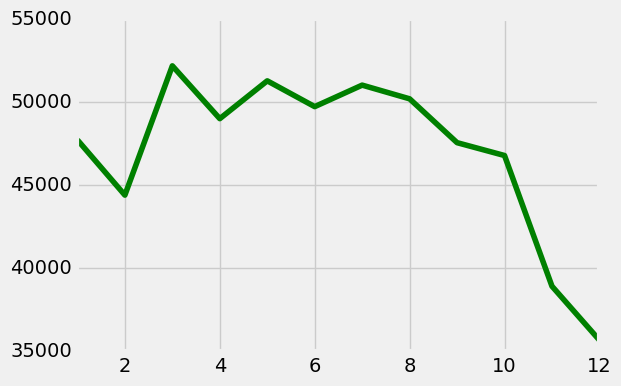

In [29]:
groupedmth = chi_crime2.groupby([times.month])
groupedmth.Arrest.sum().plot(kind = 'line', color = 'g')

In [41]:
groupedyr = chi_crime2.groupby([times.year])
groupedyr['Location Description'].value_counts()[710:715]

      Location Description
2016  STREET                  51171
      RESIDENCE               37102
      APARTMENT               28603
      SIDEWALK                20354
      OTHER                    9299
Name: Location Description, dtype: int64

In [ ]:
#  Violent crime by location - interesting differences

newchi2 = chiviol.groupby('Location Description').agg({'Primary Type': 'value_counts'})

newchi2.head()


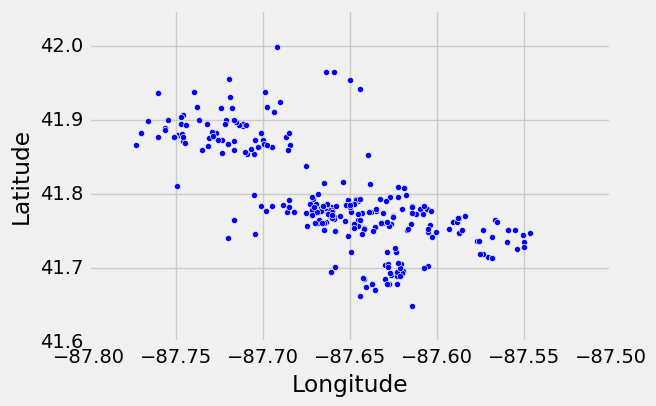

In [27]:
newchi3 = chiviol[chiviol['Location Description'] == 'ABANDONED BUILDING']
newchi3.plot.scatter('Longitude','Latitude')


In [28]:
newchi3.plot.scatter('Longitude','Latitude')
mplleaflet.display()
